<a href="https://colab.research.google.com/github/Nkeeydata/Used_Car_Prediction1/blob/main/UsedCarPrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSN HACKANTHON CHALLENGE FOR AI BOOTCAMP 2025

### Used Car Prediction

### INTRODUCTION

Seeing that the prices of new branded cars are on the high side due to changes in my country's economy, I decided to go for fairly used cars. So this project is to build a model that could be used to predict the prices of used cars to enable know the features that affects prices of cars before micro shopping. The datasets was gotten and downloaded from ```kaggle```, and it comprises of the ```train datasets```, the ```test datasets```, and the ```submission datasets``` which will act as our format for the final submission.

### COLUMN DESCRIPTION

```Transmission``` refers to whether your car has a manual or automatic gear.

```Accident``` refers to whether the car has collided with another vehicle or something else. Previous accidents can significantly impact a car's value, even if repairs were done well.

```Brand``` refers to the make of the car. That is, the manufacturer's or company name. Some brands are known for reliability and longevity, which helps them maintain higher resale values. For example, Toyota

```model_year``` refers to the year the car was produced. The price of a car diminishes with time and its usage. Aspects include car models, variants, supply and demand, and price

```Mileage``` is the distance travelled by the car since produced. Usually cars with higher mileage will have a reduced value on the basis that they have been used more and likely to experience wear and.

```Model``` is the name of a car product or a line of cars. Example, camry

```Fuel_type``` is responsible for the fuel rate consumption of the car. it is a type of engine

```engine``` is the machine that powers the car, and it can be grouped according to ```fuel_type```

### IMPORTATION OF LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

# visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

### LOADING OF DATASETS

In [ ]:
df_r = pd.read_csv('train12.csv') # training datasets
df_t = pd.read_csv('test12.csv') #testing datasets
df_s = pd.read_csv('sample_submission12.csv') #sample submission datasets

### DUPLICATING DATASETS


In [ ]:
dfr = df_r.copy()
dft = df_t.copy()

### DATA EXPLORATION

In [ ]:
df_r.head() # displaying the first five rows of the dataset

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
df_r.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
df_t.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In [ ]:
df_r.shape #row and column number in train datasets

(188533, 13)

In [ ]:
df_t.shape # row and column number in test datasets

(125690, 12)

In [ ]:
df_r.info() #displaying the datatype and non-null values of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df_t.info() # reviewing the non-null and datatypes of the test datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [ ]:
df_r.isnull().sum() #reviewing the actual number of null values in the train dataset

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [ ]:
df_t.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

### MERGING BOTH TRAIN AND TEST DATASET BEFORE DATA PREPROCESSING

In [ ]:
df_r['source'] = 'train'
df_t['source'] = 'test'

In [ ]:
df_all = pd.concat([df_r, df_t], ignore_index=True)

### CHECKING THE UNIQUES VALUES FOR EACH COLUMN

In [ ]:
df_all['brand'].value_counts() # viewing the original brand name

brand
Ford             38353
Mercedes-Benz    32047
BMW              28314
Chevrolet        27033
Audi             18176
Porsche          17765
Land             15873
Toyota           14934
Lexus            14372
Jeep             10886
Cadillac          7733
RAM               7002
Nissan            6604
Tesla             6125
INFINITI          5399
GMC               5309
Dodge             5204
Mazda             4489
Kia               4247
Lincoln           4016
Subaru            3972
Acura             3849
Honda             3537
Hyundai           3353
Volkswagen        2987
Jaguar            2253
Bentley           1944
MINI              1761
Genesis           1612
Buick             1591
Maserati          1558
Lamborghini       1356
Volvo             1299
Chrysler          1241
Alfa              1149
Rivian             980
Rolls-Royce        944
Mitsubishi         918
Pontiac            879
Hummer             862
Ferrari            610
McLaren            408
Aston              382
Satur

### Grouping of my column variables to reduce noise while training the machine

In [ ]:
brand_counts = df_all['brand'].value_counts()
top_brands = brand_counts[brand_counts > 10000].index
df_all['brand_grouped'] = df_all['brand'].apply(lambda x: x if x in top_brands else 'Other')


In [ ]:
df_all['brand_grouped'].value_counts() #new brand variables

brand_grouped
Other            96470
Ford             38353
Mercedes-Benz    32047
BMW              28314
Chevrolet        27033
Audi             18176
Porsche          17765
Land             15873
Toyota           14934
Lexus            14372
Jeep             10886
Name: count, dtype: int64

In [ ]:
df_all['model'].value_counts() #model variable up to 1898 before grouping

model
F-150 XLT                   4868
M3 Base                     3641
Camaro 2SS                  2820
M4 Base                     2627
Mustang GT Premium          2464
                            ... 
X5 xDrive40e                   2
Forte LX                       2
V60 T6 R-Design Platinum       2
X5 3.0i                        1
allroad 2.7T                   1
Name: count, Length: 1898, dtype: int64

In [ ]:
# Grouping my model

model_counts = df_all['model'].value_counts()
rare_models = model_counts[model_counts < 2000].index
df_all['model_grouped'] = df_all['model'].apply(lambda x: x if x not in rare_models else 'Other')


In [ ]:
df_all['model_grouped'].value_counts() #new model variables

model_grouped
Other                   289250
F-150 XLT                 4868
M3 Base                   3641
Camaro 2SS                2820
M4 Base                   2627
Mustang GT Premium        2464
F-150 Lariat              2304
E-Class E 350 4MATIC      2239
1500 Laramie              2006
911 Carrera S             2004
Name: count, dtype: int64

In [ ]:
df_all['fuel_type'].value_counts()

fuel_type
Gasoline          276473
Hybrid             11508
E85 Flex Fuel       8929
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In [ ]:
global_mode = df_all['fuel_type'].mode()[0]
df_all['fuel_type'].fillna(global_mode, inplace=True)


C:\Users\Nkechi Pc\AppData\Local\Temp\ipykernel_20572\1167709264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['fuel_type'].fillna(global_mode, inplace=True)


In [ ]:
df_all['fuel_type'].value_counts()

fuel_type
Gasoline          284939
Hybrid             11508
E85 Flex Fuel       8929
Diesel              6641
–                   1319
Plug-In Hybrid       858
not supported         29
Name: count, dtype: int64

In [ ]:
# Grouping my engine

engine_counts = df_all['engine'].value_counts()
rare_engines = engine_counts[engine_counts < 2000].index
df_all['engine_grouped'] = df_all['engine'].apply(lambda x: x if x not in rare_engines else 'Other')

In [ ]:
df_all['engine_grouped'].value_counts()

engine_grouped
Other                                                    238588
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel               5651
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel               4868
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel               4694
2.0L I4 16V GDI DOHC Turbo                                 4513
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel              4090
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel              4001
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel               3689
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel               3539
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel      3453
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel      3451
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel              3216
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel              3167
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel              3167
3.5L V6 24V PDI DOHC Twin Turbo                            3100
301.0HP 4.6L 8 Cylinder E

In [ ]:
df_all['transmission'].value_counts()

transmission
A/T                                                   83036
8-Speed A/T                                           34586
Transmission w/Dual Shift Mode                        32079
6-Speed A/T                                           30105
6-Speed M/T                                           19863
7-Speed A/T                                           18498
Automatic                                             17866
8-Speed Automatic                                     13977
10-Speed A/T                                          13347
9-Speed A/T                                            6450
5-Speed A/T                                            5458
10-Speed Automatic                                     5268
6-Speed Automatic                                      4690
4-Speed A/T                                            4212
5-Speed M/T                                            4048
9-Speed Automatic                                      3878
CVT Transmission           

In [ ]:
# Grouping my transmission column

def simplify_transmission(value):
    value = str(value).lower()
    if 'manual' in value or 'm/t' in value:
        return 'Manual'
    elif 'a/t' in value or 'automatic' in value or 'shift mode' in value or 'speed a/t' in value:
        return 'Automatic'
    else:
        return 'Unknown'  # fallback for rare or unclear entries

df_all['transmission_grouped'] = df_all['transmission'].apply(simplify_transmission)


In [ ]:
df_all['transmission_grouped'].value_counts() # New transmission group

transmission_grouped
Automatic    282677
Manual        27143
Unknown        4403
Name: count, dtype: int64

In [ ]:
# Combining interior and exterior color into one column

df_all['color_combo'] = df_all['ext_col'] + '_' + df_all['int_col']

In [ ]:
df_all['color_combo'].value_counts()

color_combo
Black_Black                                56547
White_Black                                34313
Gray_Black                                 26859
Silver_Black                               18623
White_Beige                                16918
                                           ...  
White Diamond Tri-Coat_Tupelo                  1
Kodiak Brown Metallic_Gray                     1
Midnight Black_Shara Beige                     1
Majestic Plum Metallic_Macchiato               1
Eminent White Pearl_Black / Express Red        1
Name: count, Length: 4277, dtype: int64

In [ ]:
combo_counts = df_all['color_combo'].value_counts()
top_combos = combo_counts[combo_counts > 10000].index

df_all['combo_grouped'] = df_all['color_combo'].apply(lambda x: x if x in top_combos else 'other')


In [ ]:
df_all['combo_grouped'].value_counts() #New color column

combo_grouped
other           149669
Black_Black      56547
White_Black      34313
Gray_Black       26859
Silver_Black     18623
White_Beige      16918
Blue_Black       11294
Name: count, dtype: int64

In [ ]:
# Not satisfied with the previous grouping, then proceeded with this second grouping

luxury_combos = ['Black_Beige', 'White_Cream', 'Silver_Black']
sporty_combos = ['Red_Black', 'Blue_Black']

def combo_tier(x):
    if x in luxury_combos:
        return 'Luxury'
    elif x in sporty_combos:
        return 'Sporty'
    else:
        return 'Standard'

df_all['combo_grouped'] = df_all['color_combo'].apply(combo_tier)


In [ ]:
df_all['combo_grouped'].value_counts() # Updated color grouping

combo_grouped
Standard    268382
Luxury       26175
Sporty       19666
Name: count, dtype: int64

In [ ]:
df_all['accident']

0                                  None reported
1         At least 1 accident or damage reported
2                                  None reported
3                                  None reported
4                                  None reported
                           ...                  
314218                             None reported
314219                             None reported
314220                             None reported
314221                             None reported
314222                             None reported
Name: accident, Length: 314223, dtype: object

In [ ]:
# replacing the variable names with Accident or No-Accident

df_all['accident'] = df_all['accident'].replace({
    'At least 1 accident or damage reported': 'Accident',
    'None reported': 'No-Accident'
})


In [ ]:
df_all['accident'].value_counts()

accident
No-Accident    240777
Accident        69362
Name: count, dtype: int64

In [ ]:
df_all['clean_title']

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
314218    Yes
314219    NaN
314220    Yes
314221    Yes
314222    Yes
Name: clean_title, Length: 314223, dtype: object

In [ ]:
# Grouping of the model_year to reduce the noise when training as well

def group_by_decade(year):
    if year < 1990:
        return 'Pre-90s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

df_all['year_group'] = df_all['model_year'].apply(group_by_decade)


In [ ]:
df_all['year_group'].value_counts() # new model_year variables

year_group
2010s      169117
2020s       97791
2000s       44323
1990s        2972
Pre-90s        20
Name: count, dtype: int64

In [ ]:
df_all['milage'].value_counts()

milage
60000     2182
170000    2165
120000    1920
110000    1918
130000    1634
          ... 
70169        1
151775       1
87582        1
133815       1
21436        1
Name: count, Length: 8440, dtype: int64

In [ ]:
# Grouping of milage according to the number

def mileage_bucket(m):
    if m < 20000:
        return 'Very Low'
    elif m < 60000:
        return 'Low'
    elif m < 120000:
        return 'Moderate'
    elif m < 180000:
        return 'High'
    else:
        return 'Very High'

df_all['milage_grouped'] = df_all['milage'].apply(mileage_bucket)


In [ ]:
df_all['milage_grouped'].value_counts()

milage_grouped
Moderate     102577
Low           95461
Very Low      66765
High          42006
Very High      7414
Name: count, dtype: int64

### WORKING ON MISSING VALUES

In [ ]:
df_all.isnull().sum()

id                           0
brand                        0
model                        0
model_year                   0
milage                       0
fuel_type                    0
engine                       0
transmission                 0
ext_col                      0
int_col                      0
accident                  4084
clean_title              35658
price                   125690
source                       0
brand_grouped                0
model_grouped                0
engine_grouped               0
transmission_grouped         0
color_combo                  0
combo_grouped                0
year_group                   0
milage_grouped               0
dtype: int64

In [ ]:
df_all['accident'].fillna('Unknown', inplace=True)

C:\Users\Nkechi Pc\AppData\Local\Temp\ipykernel_20572\1543708893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['accident'].fillna('Unknown', inplace=True)


In [ ]:
df_all['accident'].value_counts()

accident
No-Accident    240777
Accident        69362
Unknown          4084
Name: count, dtype: int64

In [ ]:
df_all['clean_title'].value_counts()

clean_title
Yes    278565
Name: count, dtype: int64

#### Since all reported values for clean_title is ```YES```, I would fill the missing values with YES, but if not correlated with price, I will drop it.

In [ ]:
df_all['clean_title'].fillna('Yes', inplace=True) # replacing the missing values with same YES since all filled YES

In [ ]:
df_all['clean_title'].isnull().sum() # confirming the removal of null values

0

### DROPPING of the original column names before grouping

In [ ]:
df_new = df_all.drop(columns=['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'ext_col', 'int_col', 'clean_title', 'color_combo'])

In [ ]:
df_new.head()

### RENAMING MY COLUMN NAMES TO THEIR ORIGINAL COLUMN NAMES

In [ ]:
df = df_new
df  = df.rename(columns = {'brand_grouped':'brand', 'model_grouped':'model', 'year_group':'model_year', 'engine_grouped':'engine', 'transmission_grouped':'transmission', 'combo_grouped':'color_combo', 'milage_grouped':'milage'})

In [ ]:
df.columns

### DATA VISUALIZATIONS

Text(0.5, 1.0, 'Distribution of Car Prices')

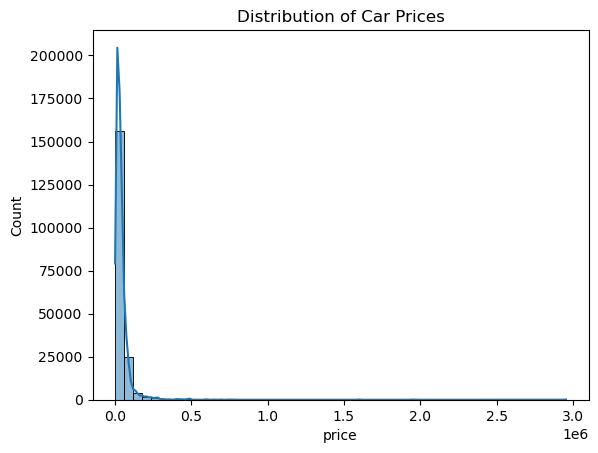

In [ ]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')


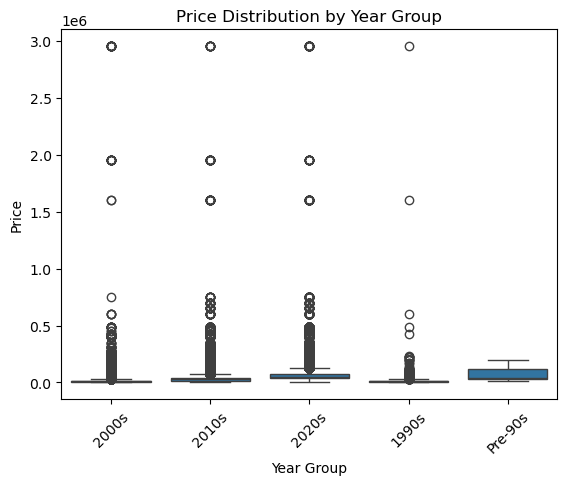

In [ ]:
sns.boxplot(x='model_year', y='price', data=df)
plt.title('Price Distribution by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



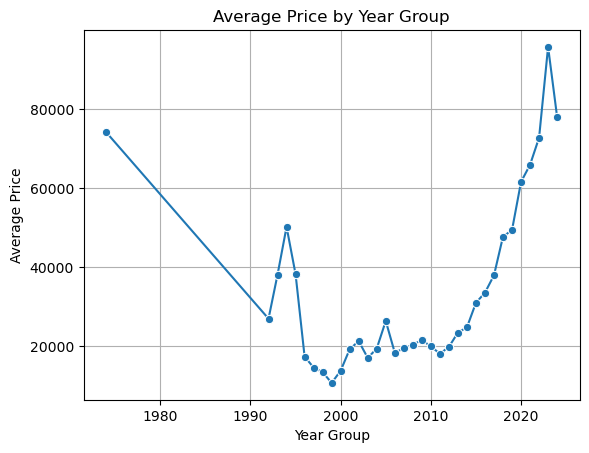

In [ ]:

year_avg = df_r.groupby('model_year')['price'].mean().reset_index()

sns.lineplot(x='model_year', y='price', data=year_avg, marker='o')
plt.title('Average Price by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


### DATA TRANSFORMATION USING ENCODERS

#### We will start by grouping into numerical and categorical variables for easy encoding

In [ ]:
features = df.drop(columns=['source', 'price']).columns.tolist()


In [ ]:
lab = LabelEncoder()
df['model_year_encoded'] = lab.fit_transform(df['model_year'])


In [ ]:
# converting back into DataFrame

df_encoded_year = pd.DataFrame(df['model_year_encoded'], columns=['model_year_encoded'])
df_encoded_year

,model_year_encoded
0,1
1,1
2,1
3,2
4,3
...,...
314218,2
314219,2
314220,2
314221,2


#### Encoding the remaining column names except model_year

In [ ]:
features_to_encode = [col for col in features if col != 'model_year']
cat_var = df[features_to_encode].select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
df_encoded = pd.get_dummies(df_all[cat_var], drop_first=True)


In [ ]:
df_encoded['model_year'] = df['model_year_encoded']


In [ ]:
df_encoded.head()

,milage,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_No-Accident,accident_Unknown,brand_Alfa,...,color_combo_–_Rioja Red,color_combo_–_Sakhir Orange,color_combo_–_Sakhir Orange/Black,color_combo_–_Sport,color_combo_–_Tan,color_combo_–_Tan/Ebony/Ebony,color_combo_–_Very Light Cashmere,color_combo_–_White,color_combo_–_–,model_year
0,213000,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
1,143250,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,136731,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
3,19500,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2
4,7388,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3


In [ ]:
# Assigning both source and price to a dataframe df_final

source_price = df_all[['source', 'price']]
df_final = pd.concat([df_encoded, source_price], axis=1)


### UNMERGING BOTH MY TRAIN AND TEST DATASET BEFORE SPLITTING FOR TRAINING AND TESTING

In [ ]:
df_r_clean = df_final[df_final['source'] == 'train'].drop(columns='source')
df_t_clean = df_final[df_final['source'] == 'test'].drop(columns=['source', 'price'])  # test has no price


### Splitting into X and y variable for training purposes

In [ ]:
X = df_r_clean
y = df_r_clean['price']

In [ ]:
# Using train_test_split to split the variables
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Training XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 23963.23


C:\Users\Nkechi Pc\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Checking to confirm that the length of both test and sample submission is same

print(len(df_t_clean), len(df_s))


125690 125690


In [ ]:
# Checking if test dataset has same columns as X_train due to the OneHotEncoding done

missing_cols = set(X_train.columns) - set(df_t_clean.columns)
extra_cols = set(df_t_clean.columns) - set(X_train.columns)

print("Missing columns in df_t_clean:", missing_cols)
print("Extra columns in df_t_clean:", extra_cols)


Missing columns in df_t_clean: {'price'}
Extra columns in df_t_clean: set()


In [ ]:
# Add missing columns with default value 0 just to align the columns
for col in missing_cols:
    df_t_clean[col] = 0

# Drop extra columns
df_t_clean = df_t_clean[X_train.columns]


In [ ]:
# Assigning my predicted value from the test dataset to y_pred

y_pred = xgb_model.predict(df_t_clean)


In [ ]:
# Assigning y_pred value to the price column in the submission dataset
df_s['price'] = y_pred


In [ ]:
# Saving and viewing the new sample submission file

df_s.to_csv('updated_submission.csv', index=False)
df_s

,id,price
0,188533,3620.414307
1,188534,3620.414307
2,188535,3620.414307
3,188536,3620.414307
4,188537,3620.414307
...,...,...
125685,314218,3620.414307
125686,314219,3620.414307
125687,314220,3620.414307
125688,314221,3620.414307


### Viewing the top 10 important features of my model

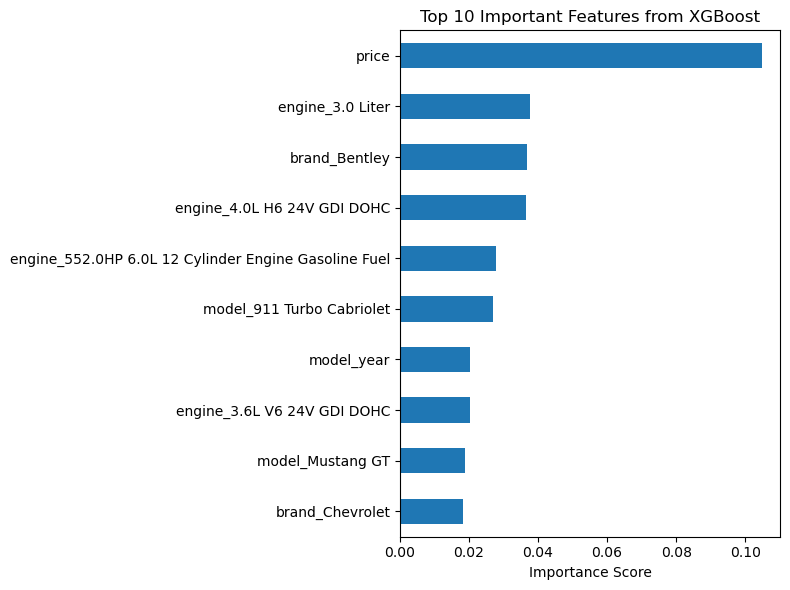

In [ ]:
# Get feature importances as a Series
importance_series = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Sort and select top 10
top_10 = importance_series.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
top_10.plot(kind='barh')
plt.title('Top 10 Important Features from XGBoost')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


### THANK YOU